In [99]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import make_regression

def f1(x):
  return x * np.sin(x) + 2 * x

def f2(x):
  return 10 * np.sin(x) + x ** 2

def f3(x):
  return np.sign(x) * (x ** 2 + 300) + 20 * np.sin(x)

tr = 20
n_samples = 100
X1 = np.linspace(-tr, tr, n_samples)
y1 = f1(X1)
X1_train, X1_test, y1_train, y1_test = train_test_split(
X1, y1, train_size=0.7, random_state=42, shuffle=True
)
y1_test = y1_test[X1_test.argsort()]
X1_test.sort()

X2 = np.linspace(-tr, tr, n_samples)
y2 = f2(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(
X2, y2, train_size=0.7, random_state=42, shuffle=True
)
y2_test = y2_test[X2_test.argsort()]
X2_test.sort()

X3 = np.linspace(-tr, tr, n_samples)
y3 = f3(X3)
X3_train, X3_test, y3_train, y3_test = train_test_split(
X3, y3, train_size=0.7, random_state=42, shuffle=True
)
y3_test = y3_test[X3_test.argsort()]
X3_test.sort()

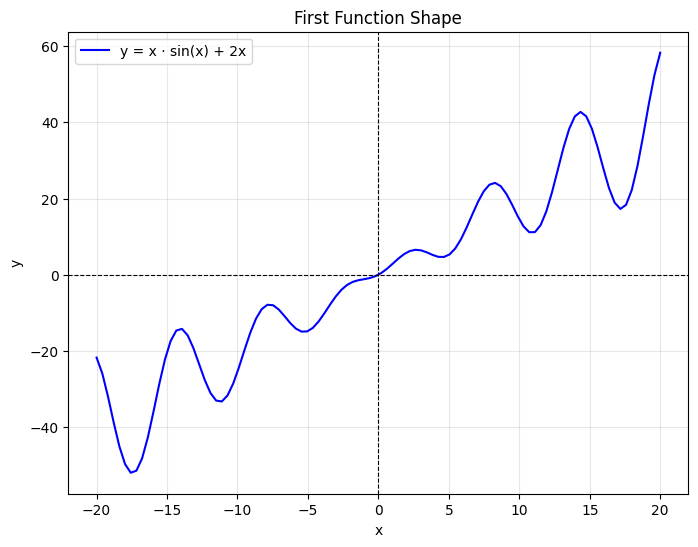

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(X1, y1, label='y = x · sin(x) + 2x', color='blue')
plt.title('First Function Shape')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

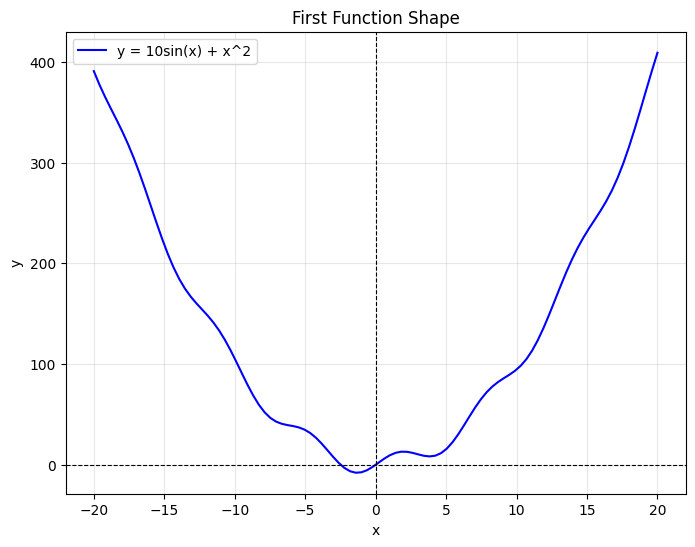

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(X2, y2, label='y = 10sin(x) + x^2', color='blue')
plt.title('First Function Shape')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

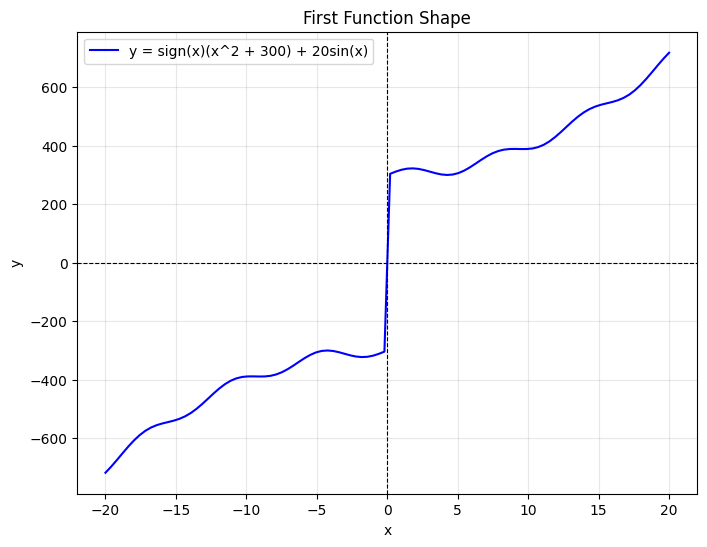

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(X3, y3, label='y = sign(x)(x^2 + 300) + 20sin(x)', color='blue')
plt.title('First Function Shape')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [107]:
def LinearReg(X_train, y_train, X_test, y_test, needr2=False):
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred = linear_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if(needr2):
      r2 = r2_score(y_test, y_pred)
      print(f"Linear Regression R2 Score: {r2:.4f}")
    print(f"Linear Regression MSE: {mse:.4f}")
    return y_pred

def PolyFeats(X_train, y_train, X_test, y_test, degree):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_model = RandomForestRegressor(random_state=42)
    poly_model.fit(X_train_poly, y_train)
    y_pred = poly_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Polynomial Regression (degree:{degree}) MSE: {mse:.4f}")
    return y_pred

def RandomForest(X_train, y_train, X_test, y_test, needr2=False):
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if(needr2):
      r2 = r2_score(y_test, y_pred)
      print(f"Linear Regression R2 Score: {r2:.4f}")
    print(f"Random Forest Regressor MSE: {mse:.4f}")
    return y_pred

def GradientBoost(X_train, y_train, X_test, y_test, needr2=False):
    gb_model = GradientBoostingRegressor(random_state=42)
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if(needr2):
      r2 = r2_score(y_test, y_pred)
      print(f"Linear Regression R2 Score: {r2:.4f}")
    print(f"Gradient Boosting Regressor MSE: {mse:.4f}")
    return y_pred

Linear Regression MSE: 57.4203
Random Forest Regressor MSE: 7.0098
Gradient Boosting Regressor MSE: 15.2231


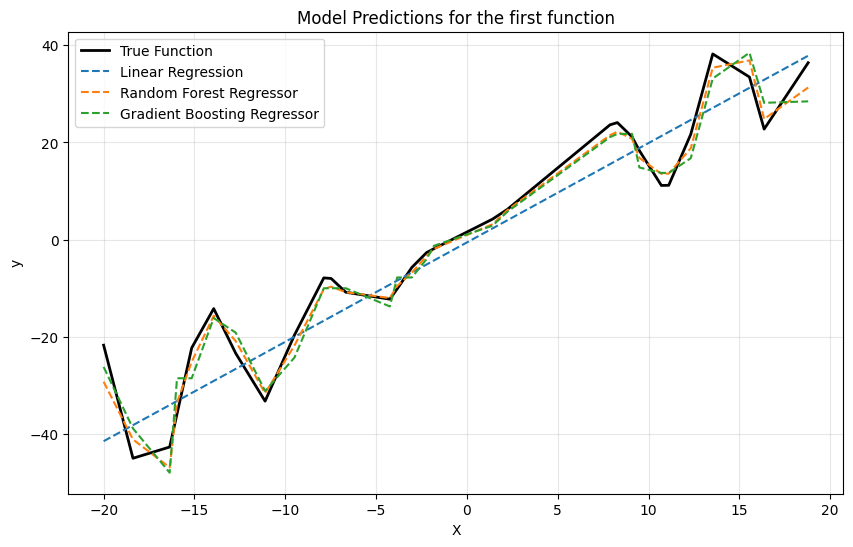

In [103]:
y1_pred_linear = LinearReg(X1_train.reshape(-1, 1), y1_train, X1_test.reshape(-1, 1), y1_test)
y1_pred_rf = RandomForest(X1_train.reshape(-1, 1), y1_train, X1_test.reshape(-1, 1), y1_test)
y1_pred_gb = GradientBoost(X1_train.reshape(-1, 1), y1_train, X1_test.reshape(-1, 1), y1_test)

plt.figure(figsize=(10, 6))
plt.plot(X1_test, y1_test, label="True Function", color="black", linewidth=2)
plt.plot(X1_test, y1_pred_linear, label="Linear Regression", linestyle="--")
plt.plot(X1_test, y1_pred_rf, label="Random Forest Regressor", linestyle="--")
plt.plot(X1_test, y1_pred_gb, label="Gradient Boosting Regressor", linestyle="--")
plt.title(f"Model Predictions for the first function")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Random Forest seems the best performing for the first function.
Gradient Boosting performs decently well.

Linear Regression MSE: 12926.8062
Random Forest Regressor MSE: 46.3123
Gradient Boosting Regressor MSE: 96.0280


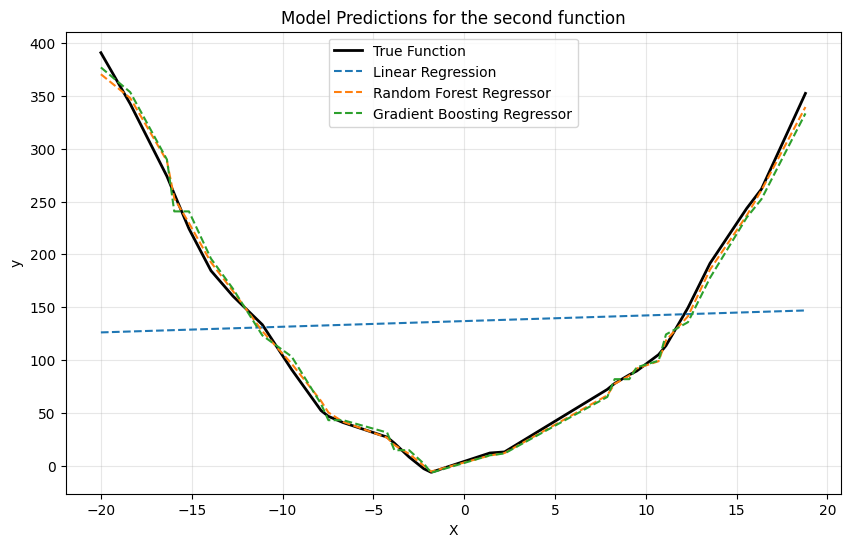

In [45]:
y2_pred_linear = LinearReg(X2_train.reshape(-1, 1), y2_train, X2_test.reshape(-1, 1), y2_test)
y2_pred_rf = RandomForest(X2_train.reshape(-1, 1), y2_train, X2_test.reshape(-1, 1), y2_test)
y2_pred_gb = GradientBoost(X2_train.reshape(-1, 1), y2_train, X2_test.reshape(-1, 1), y2_test)

plt.figure(figsize=(10, 6))
plt.plot(X2_test, y2_test, label="True Function", color="black", linewidth=2)
plt.plot(X2_test, y2_pred_linear, label="Linear Regression", linestyle="--")
plt.plot(X2_test, y2_pred_rf, label="Random Forest Regressor", linestyle="--")
plt.plot(X2_test, y2_pred_gb, label="Gradient Boosting Regressor", linestyle="--")
plt.title(f"Model Predictions for the second function")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Random Forest still performs best.
Liniar performs poorly on such shapes.

Linear Regression MSE: 13568.7639
Random Forest Regressor MSE: 71.5870
Gradient Boosting Regressor MSE: 110.2123


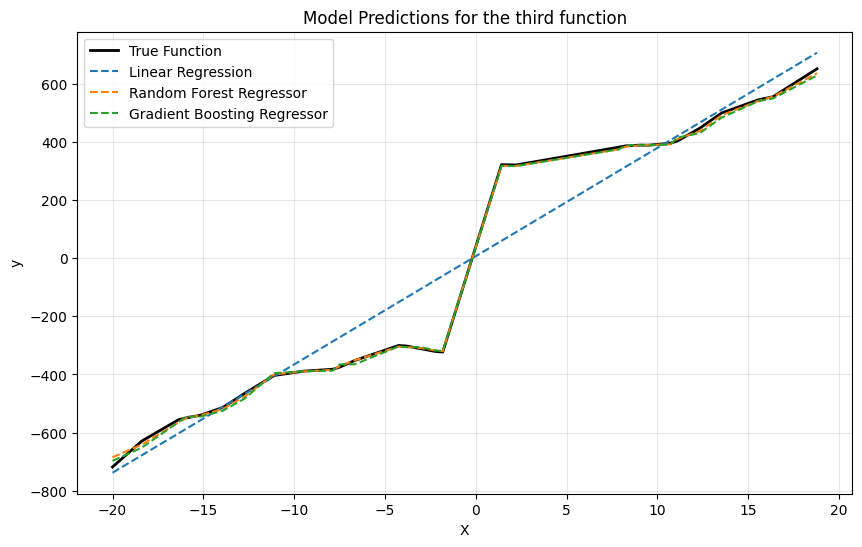

In [46]:
y3_pred_linear = LinearReg(X3_train.reshape(-1, 1), y3_train, X3_test.reshape(-1, 1), y3_test)
y3_pred_rf = RandomForest(X3_train.reshape(-1, 1), y3_train, X3_test.reshape(-1, 1), y3_test)
y3_pred_gb = GradientBoost(X3_train.reshape(-1, 1), y3_train, X3_test.reshape(-1, 1), y3_test)

plt.figure(figsize=(10, 6))
plt.plot(X3_test, y3_test, label="True Function", color="black", linewidth=2)
plt.plot(X3_test, y3_pred_linear, label="Linear Regression", linestyle="--")
plt.plot(X3_test, y3_pred_rf, label="Random Forest Regressor", linestyle="--")
plt.plot(X3_test, y3_pred_gb, label="Gradient Boosting Regressor", linestyle="--")
plt.title(f"Model Predictions for the third function")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Random Forest consistently performs the best.
Liniar rarely has acceptable performance.
Gradient Boosting is consistent but never the best performing.

The shape of the functions seems to heavily influence the performance of the liniar model, but seems mostly irrelevant for the other two.

Random Forest Regressor MSE: 7.0098
Polynomial Regression (degree:2) MSE: 5.8080


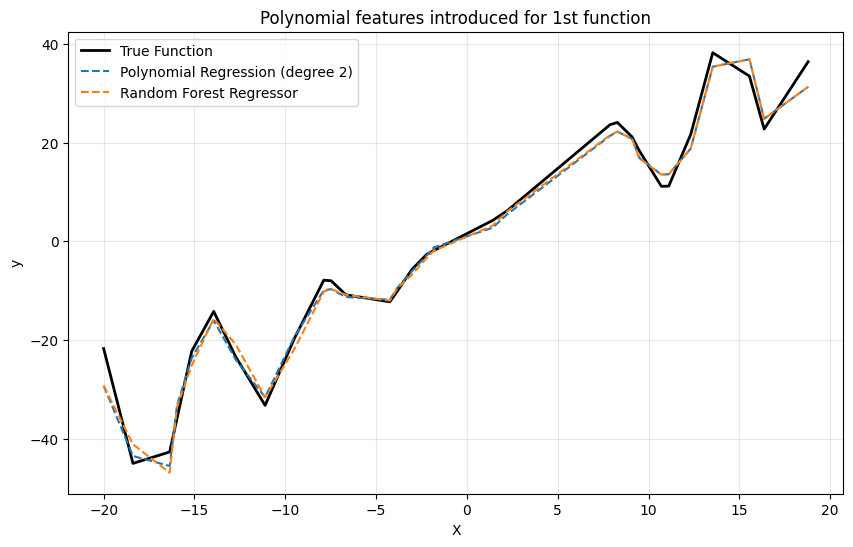

In [47]:
y1_pred_rf = RandomForest(X1_train.reshape(-1, 1), y1_train, X1_test.reshape(-1, 1), y1_test)
y1_pred_poly = PolyFeats(X1_train.reshape(-1, 1), y1_train, X1_test.reshape(-1, 1), y1_test, degree=2)
plt.figure(figsize=(10, 6))
plt.plot(X1_test, y1_test, label="True Function", color="black", linewidth=2)
plt.plot(X1_test, y1_pred_poly, label="Polynomial Regression (degree 2)", linestyle="--")
plt.plot(X1_test, y1_pred_rf, label="Random Forest Regressor", linestyle="--")
plt.title(f"Polynomial features introduced for 1st function")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Degree 2 Polynomial (best performing degree according to my tests) visibly improves the results.

Random Forest Regressor MSE: 46.3123
Polynomial Regression (degree:2) MSE: 63.0213


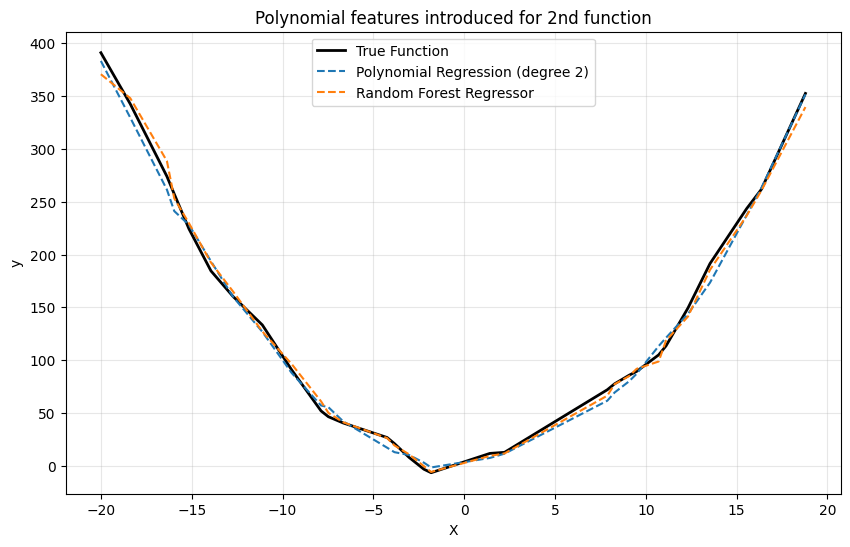

In [48]:
y2_pred_rf = RandomForest(X2_train.reshape(-1, 1), y2_train, X2_test.reshape(-1, 1), y2_test)
y2_pred_poly = PolyFeats(X2_train.reshape(-1, 1), y2_train, X2_test.reshape(-1, 1), y2_test, degree=2)
plt.figure(figsize=(10, 6))
plt.plot(X2_test, y2_test, label="True Function", color="black", linewidth=2)
plt.plot(X2_test, y2_pred_poly, label="Polynomial Regression (degree 2)", linestyle="--")
plt.plot(X2_test, y2_pred_rf, label="Random Forest Regressor", linestyle="--")
plt.title(f"Polynomial features introduced for 2nd function")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Even the best performing Polynomial only makes the results worse.

Random Forest Regressor MSE: 71.5870
Polynomial Regression (degree:2) MSE: 62.6864


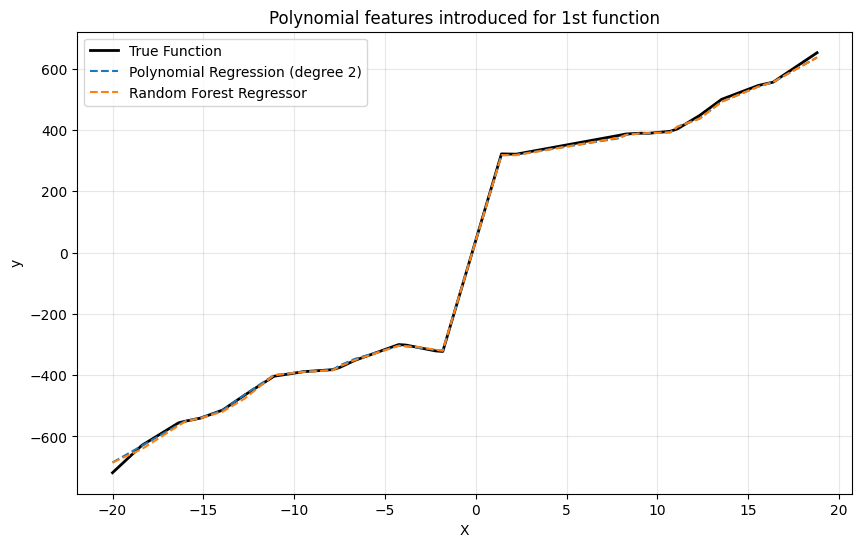

In [49]:
y3_pred_rf = RandomForest(X3_train.reshape(-1, 1), y3_train, X3_test.reshape(-1, 1), y3_test)
y3_pred_poly = PolyFeats(X3_train.reshape(-1, 1), y3_train, X3_test.reshape(-1, 1), y3_test, degree=2)
plt.figure(figsize=(10, 6))
plt.plot(X3_test, y3_test, label="True Function", color="black", linewidth=2)
plt.plot(X3_test, y3_pred_poly, label="Polynomial Regression (degree 2)", linestyle="--")
plt.plot(X3_test, y3_pred_rf, label="Random Forest Regressor", linestyle="--")
plt.title(f"Polynomial features introduced for 1st function")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Less, but still substantial improvement with degree 2 Polynomial.

###############################################2.2#################################################

In [50]:
X4, y4 = make_regression(
    n_samples=2000,
    n_features=5,
    n_informative=5,
    noise=0.0,
    effective_rank=2,
    random_state=42
)
X4_train, X4_test, y4_train, y4_test = train_test_split(
X4, y4, train_size=0.7, random_state=42, shuffle=True
)

In [51]:
print("X: ", X4)
print("y: ", y4)
print("X shape:", X4.shape)
print("y shape:", y4.shape)

X:  [[-3.40521199e-02  5.12527525e-03 -3.72509415e-03 -7.15470898e-03
  -1.67535974e-02]
 [ 2.33022156e-02  1.21750152e-04  1.26828444e-03 -1.22957635e-02
  -6.85393889e-03]
 [ 4.11737018e-05  5.00249048e-03 -3.74766353e-03  6.66826803e-03
   7.33770091e-03]
 ...
 [ 1.89520719e-02  1.40882495e-02 -3.06045630e-02  2.18011794e-03
   9.96203298e-03]
 [-7.86997272e-03 -8.10023977e-03  1.53767159e-02  2.19492151e-02
  -6.29346574e-04]
 [ 1.87924229e-02  2.45882360e-02 -1.73458334e-03 -1.73913283e-03
  -9.75684321e-03]]
y:  [-3.99985854  1.5945206   0.19207502 ... -0.32932262  1.48974537
  1.76601761]
X shape: (2000, 5)
y shape: (2000,)


In [52]:
LinearReg(X4_train, y4_train, X4_test, y4_test)
RandomForest(X4_train, y4_train, X4_test, y4_test)
y4_pred_gb = GradientBoost(X4_train, y4_train, X4_test, y4_test)

Linear Regression MSE: 0.0000
Random Forest Regressor MSE: 0.1676
Gradient Boosting Regressor MSE: 0.0818


In [73]:
X4_2, y4_2 = make_regression(
    n_samples=2000,
    n_features=5,
    n_informative=3,
    noise=0.0,
    effective_rank=2,
    random_state=42
)
X4_2_train, X4_2_test, y4_2_train, y4_2_test = train_test_split(
X4_2, y4_2, train_size=0.7, random_state=42, shuffle=True
)

In [74]:
LinearReg(X4_2_train, y4_2_train, X4_2_test, y4_2_test)
RandomForest(X4_2_train, y4_2_train, X4_2_test, y4_2_test)
y4_2_pred_gb = GradientBoost(X4_2_train, y4_2_train, X4_2_test, y4_2_test)

Linear Regression MSE: 0.0000
Random Forest Regressor MSE: 0.0432
Gradient Boosting Regressor MSE: 0.0229


None of the models seems to have any problems with multiple features.

In [53]:
X5, y5 = make_regression(
    n_samples=2000,
    n_features=5,
    n_informative=3,
    noise=15.0,
    effective_rank=2,
    random_state=42
)
X5_train, X5_test, y5_train, y5_test = train_test_split(
X5, y5, train_size=0.7, random_state=42, shuffle=True
)

In [54]:
LinearReg(X5_train, y5_train, X5_test, y5_test)
RandomForest(X5_train, y5_train, X5_test, y5_test)
y5_pred_gb = GradientBoost(X5_train, y5_train, X5_test, y5_test)

Linear Regression MSE: 228.2886
Random Forest Regressor MSE: 238.4847
Gradient Boosting Regressor MSE: 240.5125


In [55]:
X6, y6 = make_regression(
    n_samples=2000,
    n_features=5,
    n_informative=2,
    noise=15.0,
    effective_rank=2,
    random_state=42
)
X6_train, X6_test, y6_train, y6_test = train_test_split(
X6, y6, train_size=0.7, random_state=42, shuffle=True
)

In [56]:
LinearReg(X6_train, y6_train, X6_test, y6_test)
RandomForest(X6_train, y6_train, X6_test, y6_test)
y6_pred_gb = GradientBoost(X6_train, y6_train, X6_test, y6_test)

Linear Regression MSE: 237.8528
Random Forest Regressor MSE: 247.3029
Gradient Boosting Regressor MSE: 249.5684


In [57]:
X7, y7 = make_regression(
    n_samples=2000,
    n_features=5,
    n_informative=3,
    noise=10.0,
    effective_rank=2,
    random_state=42
)
X7_train, X7_test, y7_train, y7_test = train_test_split(
X7, y7, train_size=0.7, random_state=42, shuffle=True
)

In [58]:
LinearReg(X7_train, y7_train, X7_test, y7_test)
RandomForest(X7_train, y7_train, X7_test, y7_test)
y7_pred_gb = GradientBoost(X7_train, y7_train, X7_test, y7_test)

Linear Regression MSE: 101.4616
Random Forest Regressor MSE: 105.0459
Gradient Boosting Regressor MSE: 106.8746


In [75]:
X8, y8, coef = make_regression(
    n_samples=2000,
    n_features=10,
    n_informative=2,
    noise=30.0,
    coef=True,
    random_state=42
)

In [76]:
X8_train, X8_test, y8_train, y8_test = train_test_split(
    X8, y8, train_size=0.7, random_state=42
)

lr = LinearRegression()
lr.fit(X8_train, y8_train)
print("True coefficients:", coef)
print("Learned coefficients:", lr.coef_)

True coefficients: [ 0.          0.         98.57676058  0.          0.          0.
  0.          0.          0.          5.56663928]
Learned coefficients: [-1.18877743  1.86335293 98.47770902  0.50596736  0.15678536  0.69758169
 -0.67932474 -0.43221221  0.39441498  4.73449969]


Aside from the informative coefficients all of the coeffs are close to 0.

##########################################2.3#################################################

In [78]:
import pandas as pd

df = pd.read_csv('SummaryofWeather.csv')
print(df.head())

     STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001  1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001  1942-7-5      0          NaN  26.666667  21.666667  24.444444   

  Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  RHN  \
0      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
1      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
2      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
3      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
4      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   

  RVG  WTE  
0 NaN  NaN  
1 NaN  NaN  
2 NaN  NaN  
3 NaN  NaN  
4 N

<ipython-input-78-2b798f573db1>:3: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SummaryofWeather.csv')


In [79]:
print(df.isnull().sum())

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64


In [82]:
sensor_counts = df.groupby('STA')['MeanTemp'].count().sort_values(ascending=False)
top_sensors = sensor_counts.head(10).index
print("Top 10 sensors:", top_sensors)

Top 10 sensors: Index([22508, 10701, 22502, 22504, 10803, 11610, 16405, 11601, 10502, 11604], dtype='int64', name='STA')


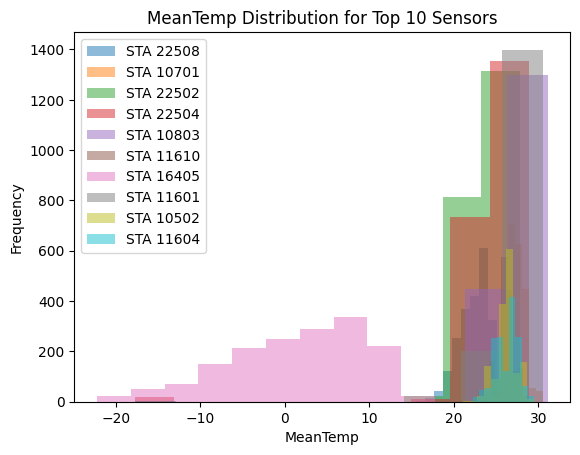

In [88]:
for sta in top_sensors:
    plt.hist(df[df['STA'] == sta]['MeanTemp'].dropna(), alpha=0.5, label=f'STA {sta}')
plt.xlabel('MeanTemp')
plt.ylabel('Frequency')
plt.legend()
plt.title('MeanTemp Distribution for Top 10 Sensors')
plt.show()

Stations with similar means and spreads are likely to be located close. E.g. 11601 and 10803, or 10701 and 22502.

Normalization is only needed if the stations we compare are in vastly different climates.

Useful pre-processing steps:


*   sorting
*   imputing missing values
*   converting data into better formats (e.g. dates)





In [89]:
sensor_id = 22508
sensor_df = df[df['STA'] == sensor_id][['Date', 'MeanTemp']].copy()

sensor_df['Date'] = pd.to_datetime(sensor_df['Date'])

sensor_df = sensor_df.sort_values('Date').reset_index(drop=True)

print(sensor_df.head())

        Date   MeanTemp
0 1940-01-01  20.000000
1 1940-01-02  19.444444
2 1940-01-03  20.000000
3 1940-01-04  21.111111
4 1940-01-05  18.333333


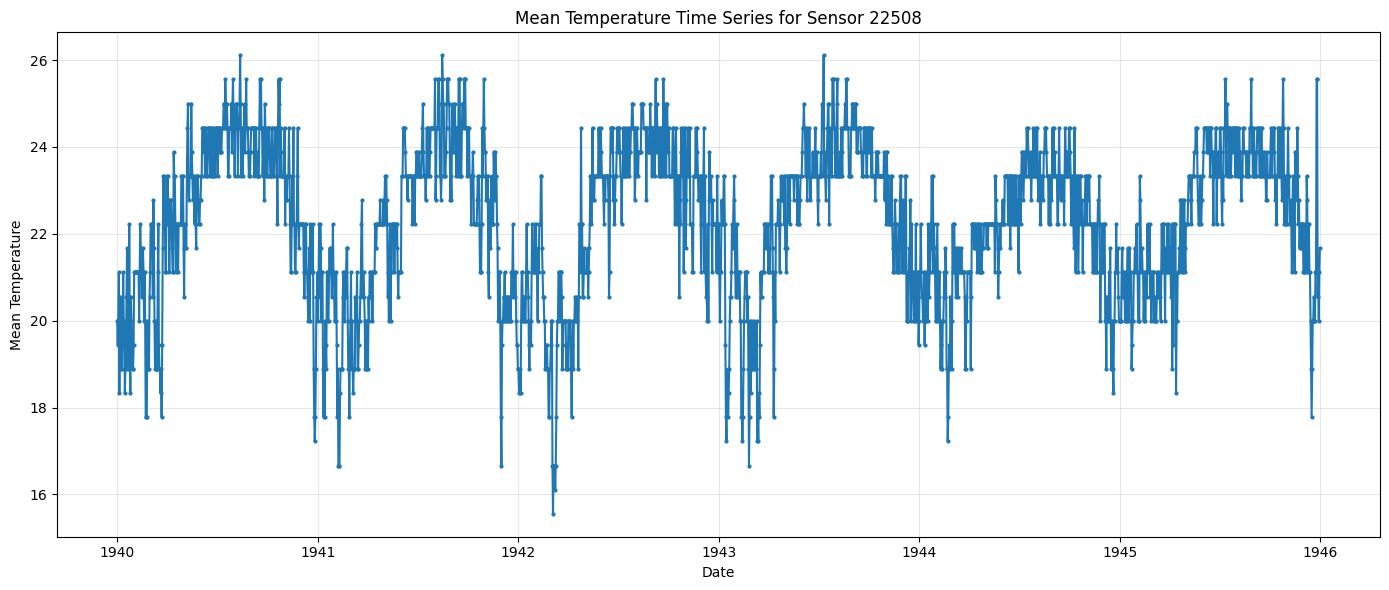

In [90]:
plt.figure(figsize=(14, 6))
plt.plot(sensor_df['Date'], sensor_df['MeanTemp'], marker='o', linestyle='-', markersize=2)
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Time Series for Sensor 22508')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [113]:
window_size = 30
X_tmp = []
y_tmp = []
dates = []
temps = sensor_df['MeanTemp'].values
date_vals = sensor_df['Date'].values
for i in range(len(temps) - window_size):
    X_tmp.append(temps[i:i+window_size])
    y_tmp .append(temps[i+window_size])
    dates.append(date_vals[i+window_size])
X, y, y_dates = np.array(X_tmp), np.array(y_tmp), np.array(dates)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("First row of X:", X[0])
print("First y:", y[0])
print("First y date:", y_dates[0])

X shape: (2162, 30)
y shape: (2162,)
First row of X: [20.         19.44444444 20.         21.11111111 18.33333333 20.
 20.55555556 18.88888889 19.44444444 18.88888889 20.         21.11111111
 20.         20.         18.33333333 18.88888889 18.88888889 20.55555556
 21.66666667 18.88888889 19.44444444 18.88888889 22.22222222 19.44444444
 18.33333333 20.55555556 20.         19.44444444 18.88888889 18.88888889]
First y: 19.44444444
First y date: 1940-01-31T00:00:00.000000000


In [114]:
y_dates = pd.to_datetime(y_dates)

train_mask = (y_dates >= pd.Timestamp('1940-01-01')) & (y_dates < pd.Timestamp('1945-01-01'))
test_mask = (y_dates >= pd.Timestamp('1945-01-01')) & (y_dates < pd.Timestamp('1946-01-01'))

X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]

print("Train samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Train samples: 1797
Test samples: 365


In [115]:
'''from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    print(f"Fold {fold+1}: Train indices {train_idx[0]}-{train_idx[-1]}, Test indices {test_idx[0]}-{test_idx[-1]}")'''

Fold 1: Train indices 0-361, Test indices 362-721
Fold 2: Train indices 0-721, Test indices 722-1081
Fold 3: Train indices 0-1081, Test indices 1082-1441
Fold 4: Train indices 0-1441, Test indices 1442-1801
Fold 5: Train indices 0-1801, Test indices 1802-2161


In [116]:
y_pred_linear = LinearReg(X_train, y_train, X_test, y_test, True)
y_pred_rf = RandomForest(X_train, y_train, X_test, y_test, True)
y_pred_gb = GradientBoost(X_train, y_train, X_test, y_test, True)

Linear Regression R2 Score: 0.6880
Linear Regression MSE: 0.7344
Linear Regression R2 Score: 0.7009
Random Forest Regressor MSE: 0.7039
Linear Regression R2 Score: 0.6930
Gradient Boosting Regressor MSE: 0.7225


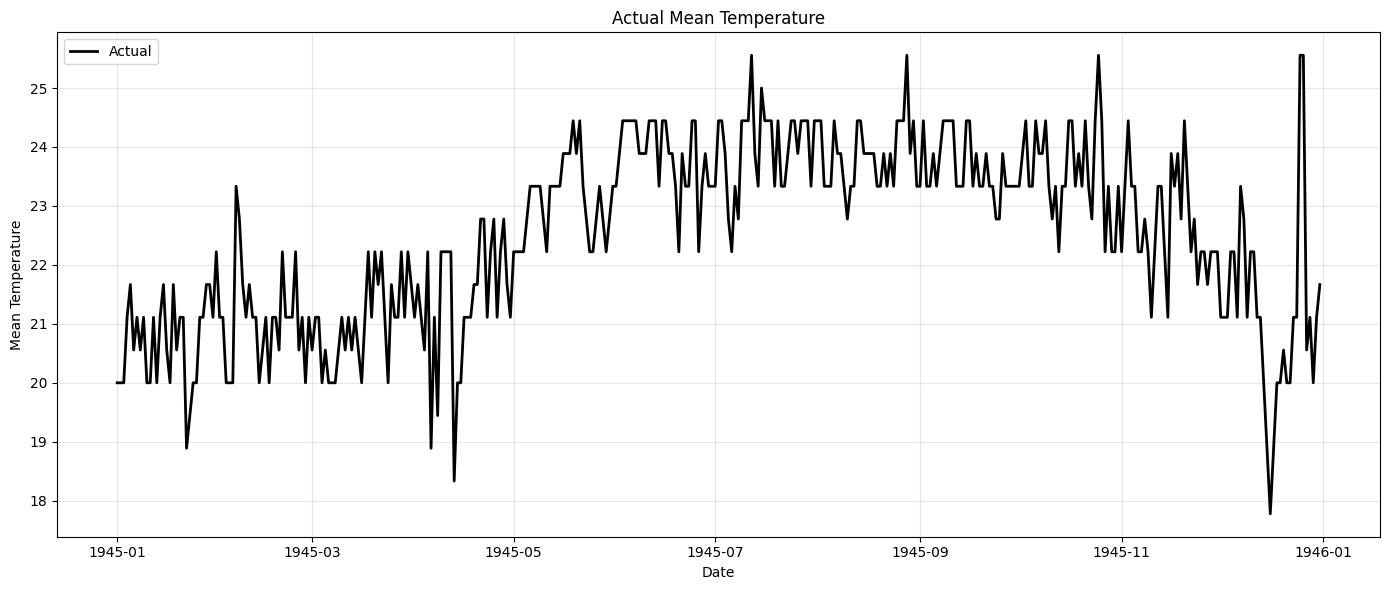

In [117]:
plt.figure(figsize=(14, 6))
plt.plot(y_dates[test_mask], y_test, label='Actual', color='black', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Actual Mean Temperature')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

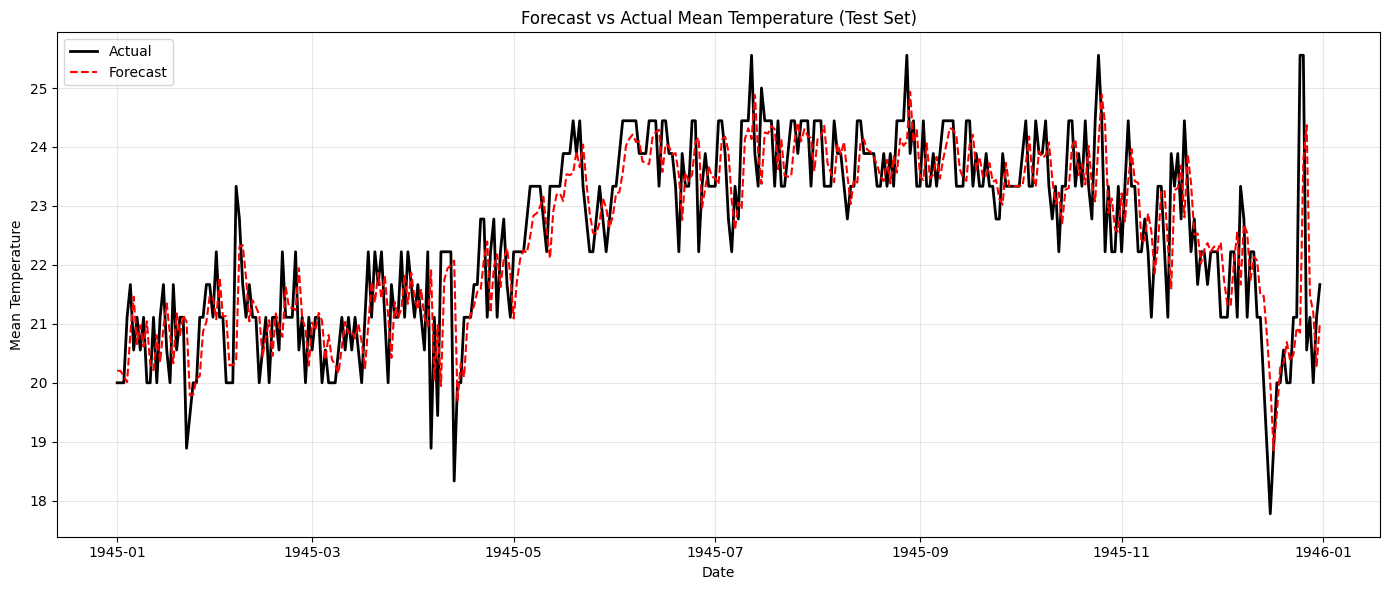

In [118]:
plt.figure(figsize=(14, 6))
plt.plot(y_dates[test_mask], y_test, label='Actual', color='black', linewidth=2)
plt.plot(y_dates[test_mask], y_pred_linear, label='Forecast', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Forecast vs Actual Mean Temperature (Test Set)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

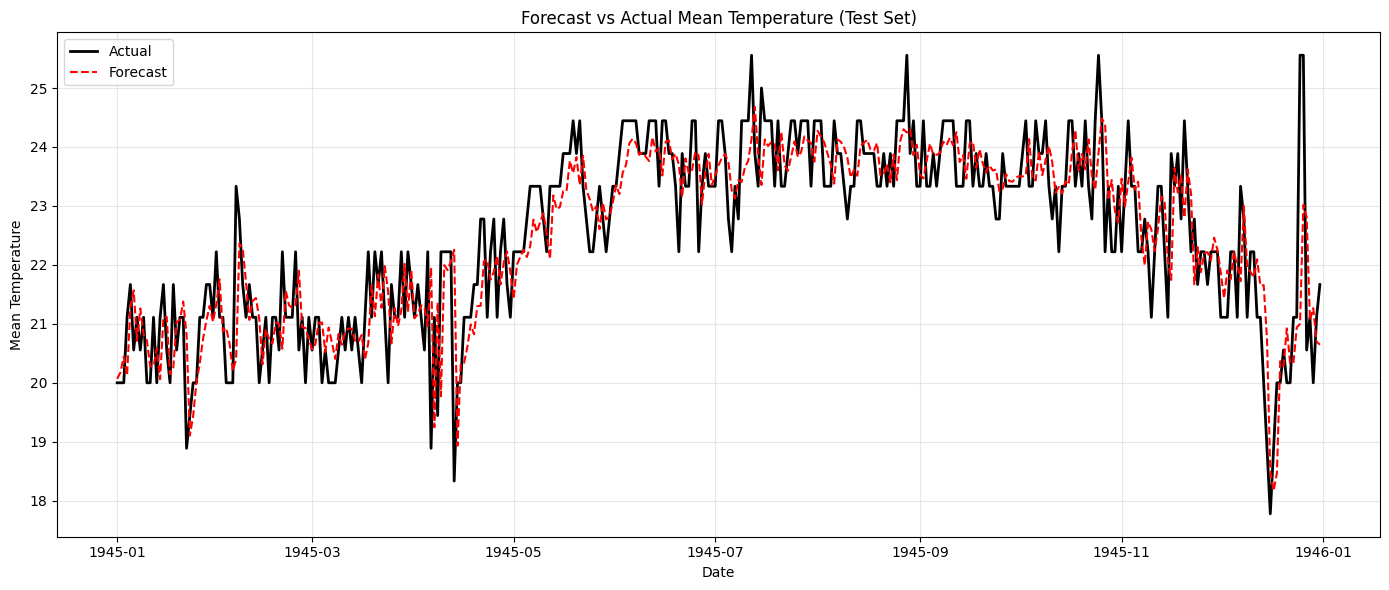

In [119]:
plt.figure(figsize=(14, 6))
plt.plot(y_dates[test_mask], y_test, label='Actual', color='black', linewidth=2)
plt.plot(y_dates[test_mask], y_pred_rf, label='Forecast', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Forecast vs Actual Mean Temperature (Test Set)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

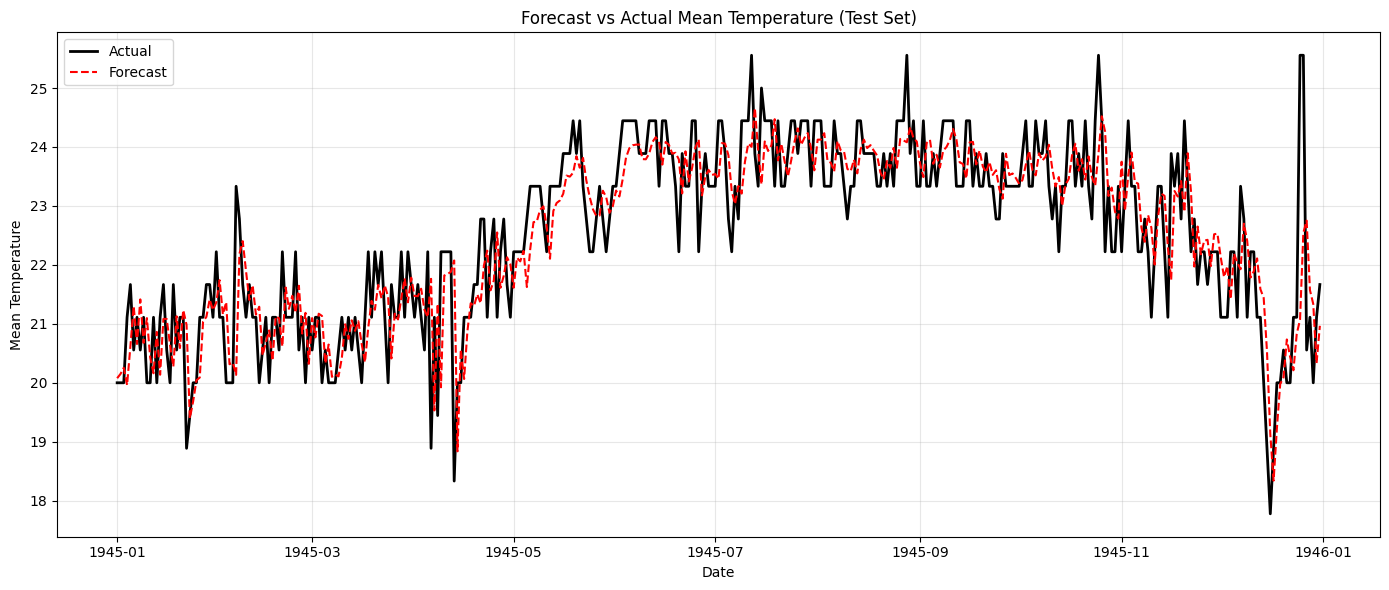

In [120]:
plt.figure(figsize=(14, 6))
plt.plot(y_dates[test_mask], y_test, label='Actual', color='black', linewidth=2)
plt.plot(y_dates[test_mask], y_pred_gb, label='Forecast', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Forecast vs Actual Mean Temperature (Test Set)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The forcasts are pretty accurate, ignoring outlier values and jumps.
The trends at least look correct.